In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

C:\Users\USER PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [6]:
#load data
X_train = np.load("train_images.npy")
y_train = np.load("train_labels.npy")

X_test = np.load("test_images.npy")
y_test = np.load("test_labels.npy")

#check shapes
print("Train images shape:",X_train.shape)
print("Train labels shape:",y_train.shape)
print("Test images shape:",X_test.shape)
print("Test labels shape:",y_test.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [17]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build Dense (MLP) model for multi-class classification (0–9)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes: digits 0–9
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # labels are integers (0–9)
    metrics=['accuracy']
)

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8916 - loss: 0.3802 - val_accuracy: 0.9518 - val_loss: 0.1754
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9559 - loss: 0.1504 - val_accuracy: 0.9605 - val_loss: 0.1362
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9682 - loss: 0.1066 - val_accuracy: 0.9667 - val_loss: 0.1092
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9763 - loss: 0.0795 - val_accuracy: 0.9707 - val_loss: 0.0997
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9807 - loss: 0.0644 - val_accuracy: 0.9705 - val_loss: 0.0994
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9848 - loss: 0.0515 - val_accuracy: 0.9699 - val_loss: 0.0941
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9873 - loss: 0.0413 - val_accuracy: 0.9753 - val_loss: 0.0863
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


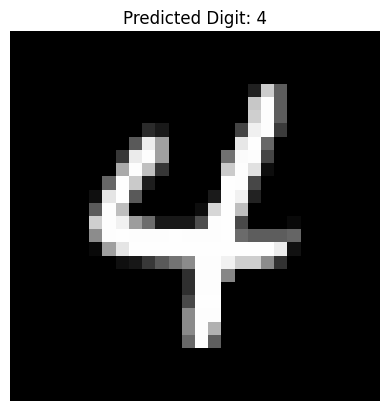

In [19]:
# Select a random test image
index = np.random.randint(0, X_test.shape[0])
image = X_test[index]

# Show the image
plt.imshow(image, cmap='gray')
plt.axis('off')

# Predict the digit
prediction = model.predict(image.reshape(1, 28, 28))
predicted_label = np.argmax(prediction)

# Display result
plt.title(f"Predicted Digit: {predicted_label}")
plt.show()